# Quick test of functions on altered waveform data

## Import packages

In [9]:
import numpy as np
import obspy as obs
import datetime as dt

## Load data

In [2]:
path = '/Users/mouchonc/Documents/GitHub/pregame/altered_data/'

# Load stream
st1 = obs.read(path + 'US.CBN.00.BH1.2015.230')
st2 = obs.read(path + 'US.CBN.00.BH2.2015.230')
st3 = obs.read(path + 'US.CBN.00.BHZ.2015.230')
st = st1 + st2 + st3

# Copy data
detrended = st.copy()
print(st)

5 Trace(s) in Stream:
US.CBN.00.BH1 | 2015-08-18T02:00:00.000000Z - 2015-08-18T21:00:00.000000Z | 40.0 Hz, 2736001 samples
US.CBN.00.BH2 | 2015-08-18T00:00:00.024900Z - 2015-08-18T23:59:59.999894Z | 40.0 Hz, 3455136 samples
US.CBN.00.BHZ | 2015-08-17T23:59:59.388143Z - 2015-08-18T09:59:59.388143Z | 40.0 Hz, 1440001 samples
US.CBN.00.BHZ | 2015-08-18T09:59:59.388143Z - 2015-08-18T21:59:59.388143Z | 40.0 Hz, 1728001 samples
US.CBN.00.BHZ | 2015-08-18T21:59:59.388143Z - 2015-08-18T23:59:59.388143Z | 40.0 Hz, 288001 samples


## Detrend data (to have flat time series)

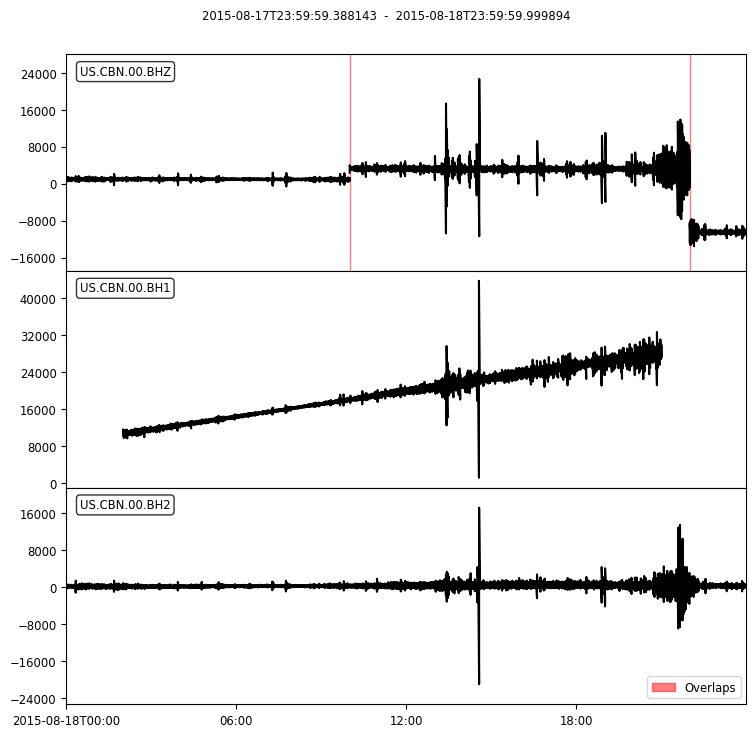

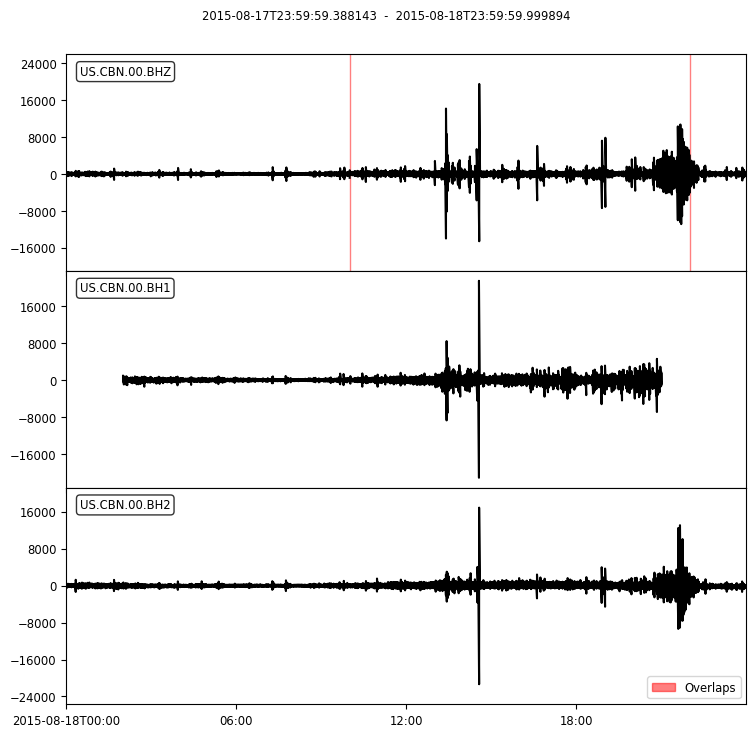

NameError: name 'plt' is not defined

In [4]:
# Detrend data
detrended.detrend("linear")
st.plot()
detrended.plot()
plt.show()

## Merge data (to remove gaps and overlapping times)

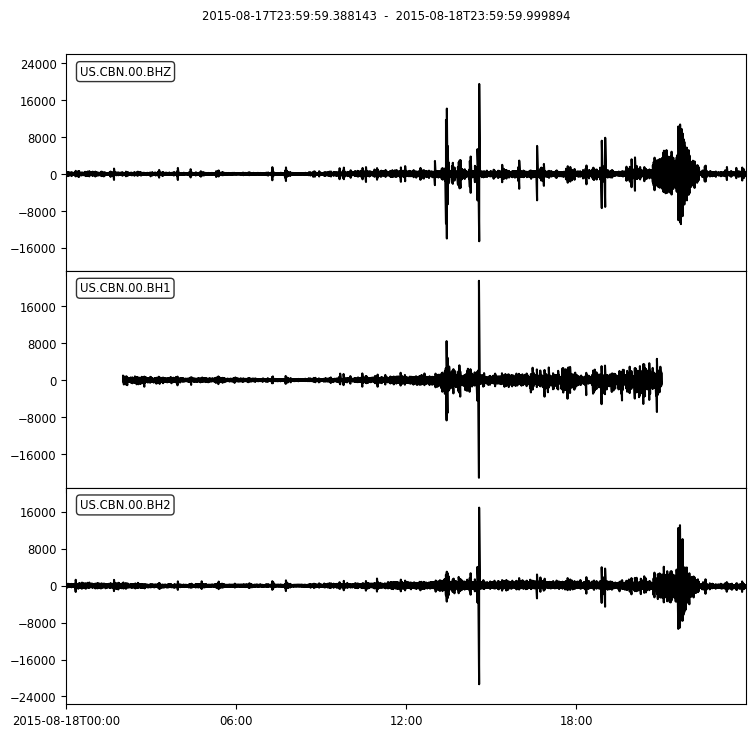

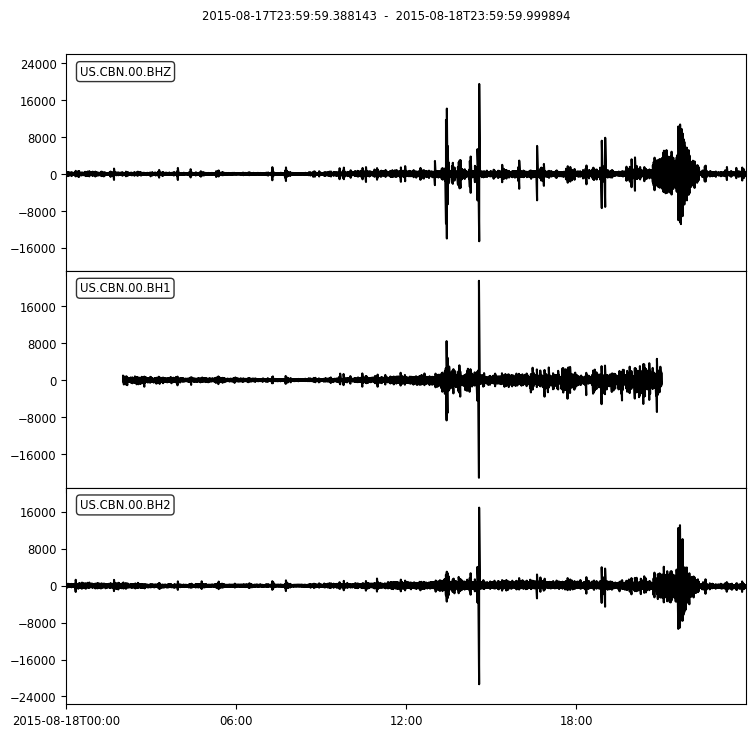

In [6]:
# Merge data
merged = detrended.copy()
merged.merge(method=1, fill_value=None)
merged.plot()

## Trim data

3 Trace(s) in Stream:
US.CBN.00.BHZ | 2015-08-17T23:59:59.388143Z - 2015-08-18T23:59:59.388143Z | 40.0 Hz, 3456001 samples
US.CBN.00.BH1 | 2015-08-18T02:00:00.000000Z - 2015-08-18T21:00:00.000000Z | 40.0 Hz, 2736001 samples
US.CBN.00.BH2 | 2015-08-18T00:00:00.024900Z - 2015-08-18T23:59:59.999894Z | 40.0 Hz, 3455136 samples
3 Trace(s) in Stream:
US.CBN.00.BHZ | 2015-08-17T23:59:59.988143Z - 2015-08-18T23:59:58.988143Z | 40.0 Hz, 3455961 samples
US.CBN.00.BH1 | 2015-08-18T00:00:00.000000Z - 2015-08-18T23:59:59.000000Z | 40.0 Hz, 3455961 samples
US.CBN.00.BH2 | 2015-08-17T23:59:59.999894Z - 2015-08-18T23:59:58.999644Z | 40.0 Hz, 3455097 samples


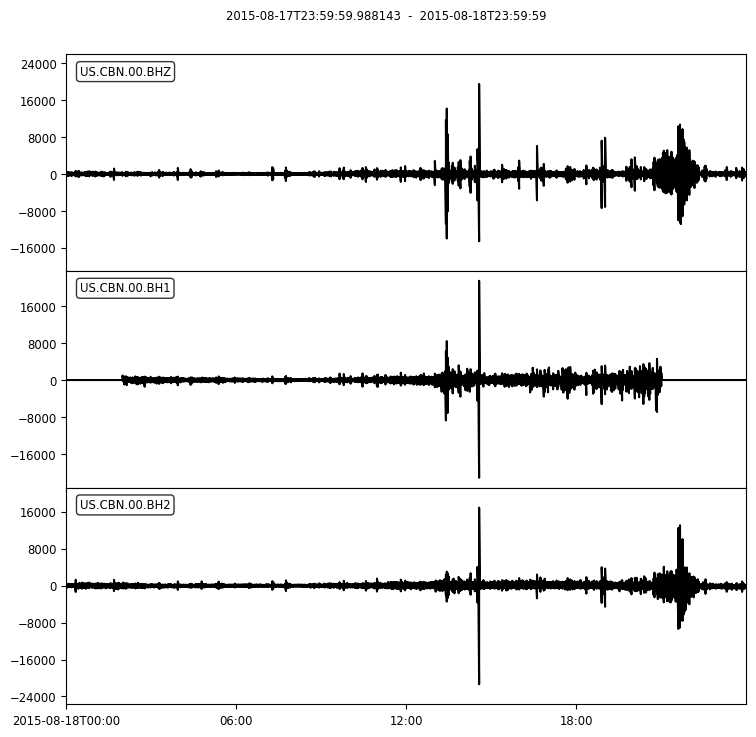

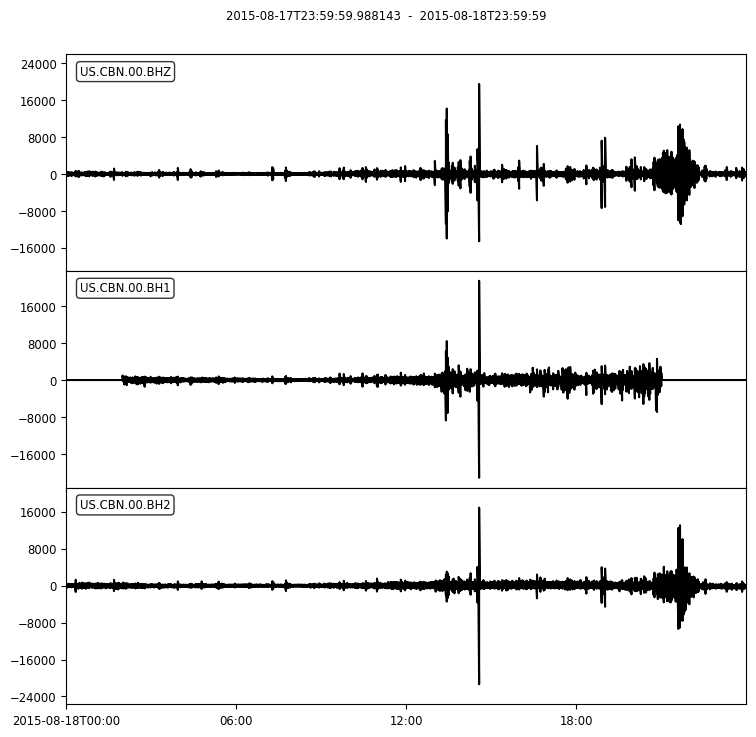

In [15]:
trimed = merged.copy()
tstart = obs.UTCDateTime("2015-08-18T00:00:00")
tend = obs.UTCDateTime("2015-08-18T23:59:59")
trimed.trim(tstart, tend, pad=True, fill_value=0)
print(merged)
print(trimed)
trimed.plot()


In [39]:
tr = merged[0]
print(tr.stats)
start_day = tr.stats.starttime.date
end_day = tr.stats.endtime.date

test = start_day == end_day
print(test)
print(start_day)

delta =  23 * 3600 + 59 * 60 + 59.999999 # in sec
true_tstart = obs.UTCDateTime(start_day)
true_tend = obs.UTCDateTime(start_day) + delta
print(true_tstart)
print(true_tend)

         network: US
         station: CBN
        location: 00
         channel: BHZ
       starttime: 2015-08-17T23:59:59.388143Z
         endtime: 2015-08-18T23:59:59.388143Z
   sampling_rate: 40.0
           delta: 0.025
            npts: 3456001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1429, 'encoding': 'FLOAT32', 'byteorder': '>', 'record_length': 4096, 'filesize': 14049280})
      processing: ["ObsPy 1.2.2: detrend(options={}::type='linear')", "ObsPy 1.2.2: detrend(options={}::type='linear')"]
False
2015-08-17
2015-08-17T00:00:00.000000Z
2015-08-17T23:59:59.999999Z


In [82]:
#base = true_tstart
base = tr.stats.starttime
tend = tr.stats.endtime
num = (tend - base) / 60
print(num)
date_list = [base + datetime.timedelta(minutes=x) for x in range(int(num))]
for i in [0,1,2,3,4,5]:
    print(date_list[i])

print(date_list[0].date == start_day)
date1 = []
date2 = []
for i in range(len(date_list)):
    #print(i)
    date1.append(date_list[i].date == start_day)
    date2.append(date_list[i].date == end_day)
    if date1[i] == date2[i]:
        print("Error: dates are the same!")
count1 = date1.count(True)
count2 = date2.count(True)
print(count1)
print(count2)
if count1 == max(count1,count2):
    true_day = start_day
elif count2 == max(count1,count2):
    true_day = end_day


print(true_day)

1440.0
2015-08-17T23:59:59.388143Z
2015-08-18T00:00:59.388143Z
2015-08-18T00:01:59.388143Z
2015-08-18T00:02:59.388143Z
2015-08-18T00:03:59.388143Z
2015-08-18T00:04:59.388143Z
True
1
1439
2015-08-18
